### Part 2
## Task 3

In [66]:
import pandas as pd
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [67]:
# Extra assumptions:

# Total miles driven by all AV vehicles
total_miles = 505229

# Probability for a day to be clear
p_clear_day = 0.72

In [68]:
# Importing the data
DMV_Data = pd.read_csv("mp1_av_disengagements.csv")

print(DMV_Data) 

       Month                Car      Location Weather TypeOfTrigger  \
0     14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
1     14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
2     14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
3     14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
4     14-Sep  WDD2221851A001072  urban-street  cloudy     automatic   
...      ...                ...           ...     ...           ...   
1019  14-Nov  WDD2221851A000495  urban-street   clear        manual   
1020  14-Nov  WDD2221851A000495  urban-street   clear        manual   
1021  14-Nov  WDD2221851A000495       highway   clear        manual   
1022  14-Nov  WDD2221851A000495  urban-street   clear        manual   
1023  14-Nov  WDD2221851A000495  urban-street   clear        manual   

      ReactionTime                              Cause  
0             0.58  Incorrect Traffic Light Detection  
1             0.66    Adverse road 

# 1.
# a.
The occurence of disengagement per mile follows a boolean (or Bernoulli) distribution, under the assumption that there can be only one disengagement per mile.

Under the assumption that the probability of disengagement for each mile is independent, the number of disengagements in $n$ miles follows a binomial distribution. The probability parameter for the disengagement per mile might differ on the conditions of that day (i.e. different parameter for clear and cloudy days).

# b. and c.
We first count the number of disengagements in cloudy and clear weather, then count the probability based on the expected miles driven for each day. We have to assume that the number of disengagements does not influence the number of miles driven.

In [69]:
# Get the weather counts
weather_counts = DMV_Data["Weather"].value_counts()
print(weather_counts)
print("Number of disengagements on cloudy days:")
print(weather_counts["cloudy"])
print("Number of disengagements on clear days")
print(weather_counts["clear"])

clear_miles = p_clear_day * total_miles
cloudy_miles = (1 - p_clear_day) * total_miles

print("Probability of disengagement per mile on a clear day is:")
p_clear = weather_counts["clear"] / clear_miles
print(p_clear)

print("Probability of disengagement per mile on a cloudy day is:")
p_cloudy = weather_counts["cloudy"] / cloudy_miles
print(p_cloudy)

Weather
cloudy    835
clear     189
Name: count, dtype: int64
Number of disengagements on cloudy days:
835
Number of disengagements on clear days
189
Probability of disengagement per mile on a clear day is:
0.0005195663748517998
Probability of disengagement per mile on a cloudy day is:
0.005902556775527249


# d.
Now we have to count the number of rows that contain "Cloudy" (resp. "Clear") in the "Weather" column, and "Automatic" in the "TypeOfTrigger" column. This can be done using pandas filter.

In [70]:
weather_auto_counts = DMV_Data[DMV_Data["TypeOfTrigger"] == "automatic"]["Weather"].value_counts()

print("Probability of an automatic disengagement per mile on a clear day is:")
p_clear_auto = weather_auto_counts["clear"] / clear_miles
print(p_clear_auto)

print("Probability of disengagement per mile on a cloudy day is:")
p_cloudy_auto = weather_auto_counts["cloudy"] / cloudy_miles
print(p_cloudy_auto)

Probability of an automatic disengagement per mile on a clear day is:
0.00026390673008345393
Probability of disengagement per mile on a cloudy day is:
0.0028063653172267283


# e.
We have our boolean probability parameter $p_{\text{cloudy}}$ for the binomial distribution for the engamement per mile under cloudy conditions. Let $X_i$ be the boolean variable that is 1 if there is a disengagement in mile $i$ and $0$ if there is no disengagment. Let 
$$
    Y = \sum_{i=1}^{10000} X_i
$$
We have to calculate
$$
    P(Y > 100)
$$
By the central limit theorem, the normalized variable
$$
Y^* = \frac{Y - 10000\cdot p_{\text{cloudy}}}{\sqrt{10000 p_{{\text{cloudy}}}(1 - p_{\text{cloudy}})}}
$$
is (very accurately) described by a normal distribution with mean 0 and standard deviation 1. We have:
$$
    P(Y > 100) = P\left(Y^* > \frac{100 - 10000 p_{\text{cloudy}}}{\sqrt{10000 p_{\text{cloudy}}(1-p_{\text{cloudy}})}}\right).
$$

In [71]:
quantity = (100 - 10000 * p_cloudy) / math.sqrt(10000 * p_cloudy * (1 - p_cloudy))
p = 1 - sp.stats.norm.cdf(quantity)
print("The probability that there are 100 disengagements per 10,000 miles under cloudy conditions is:")
print(p)

print("Sanity check: the probablity that there is 1 disengagment should be rather high:")
(100 - 10000 * p_cloudy) / math.sqrt(10000 * p_cloudy * (1 - p_cloudy))
print(1 - sp.stats.norm.cdf((1 - 10000 * p_cloudy) / math.sqrt(10000 * p_cloudy * (1 - p_cloudy))))

The probability that there are 100 disengagements per 10,000 miles under cloudy conditions is:
4.420337695876242e-08
Sanity check: the probablity that there is 1 disengagment should be rather high:
0.999999999999982


## 2
# a.
Let $X_k$ be the random variable of disengagement in mile $k$ ($X_k = 0$ if no disengagement in mile $k$, and $X_k = 1$ if there is a disengagement in mile $k$, with probability $p_{\text{cloudy}}$), and $M$ the number of miles until next engagement. We calculate:
$$
    P(M = n) = \left( \prod_{k=1}^{n-1} P(X_k = 0) \right) \cdot P(X_n = 1) = (1 - p_{\text{cloudy}})^{n-1} \cdot p_{\text{cloudy}}
$$
We see that $M$ follows a geometric distribution.

# b.
As stated in our answer to Task 3.1.a., the number of disengagements $Y_n$ per $n$ miles under cloudy conditions follows a binomial distribution, so
$$
    P(Y_n = k) = \binom{k}{n} p_{\text{cloudy}}^k (1-p_{\text{cloudy}})^{n-k}
$$
It is of course understood that $n=10,000$ and $p_{\text{cloudy}} \cong 0.006$ as calculated above, but it's way more transparant to write $n$ and $p_{\text{cloudy}}$ instead of their actual values.

# c.
Under the assumption that $n$ is very large and $p$ is very small (but keeping the average $\mu = n\cdot p$ constant), the binomial distribution can be approximated by a Poisson distribution. There is only one parameter, which is the average. The value of the Poisson that approximates $Y_{10000}$ is $\mu = 10000 \cdot p_{\text{cloudy}}$. See the value below:

In [72]:
mu = 10000 * p_cloudy
print(mu)

59.02556775527249


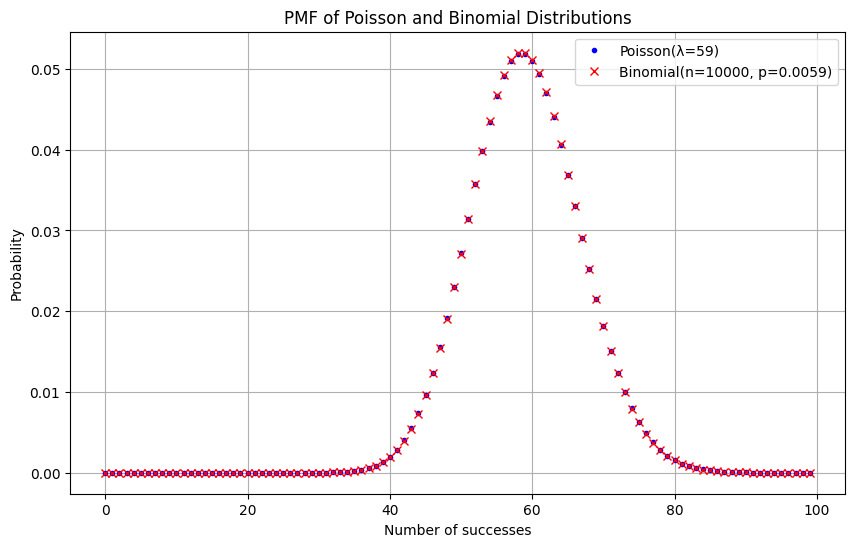

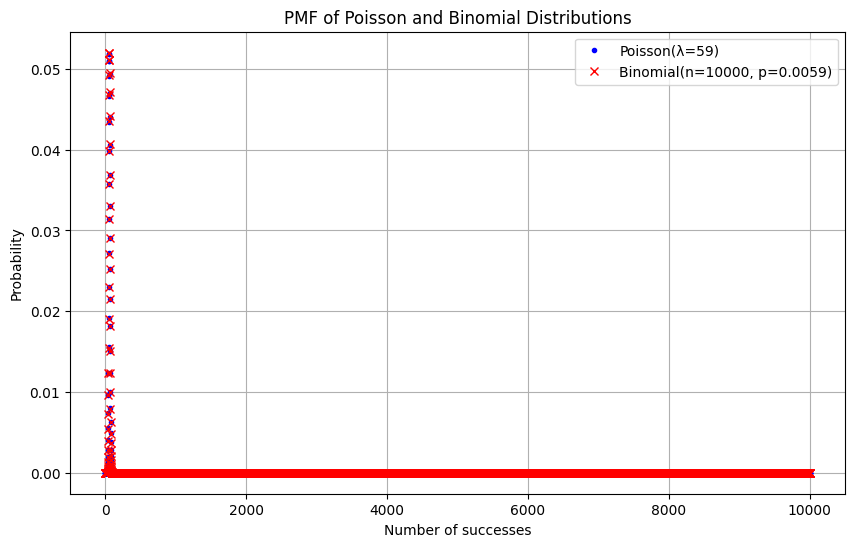

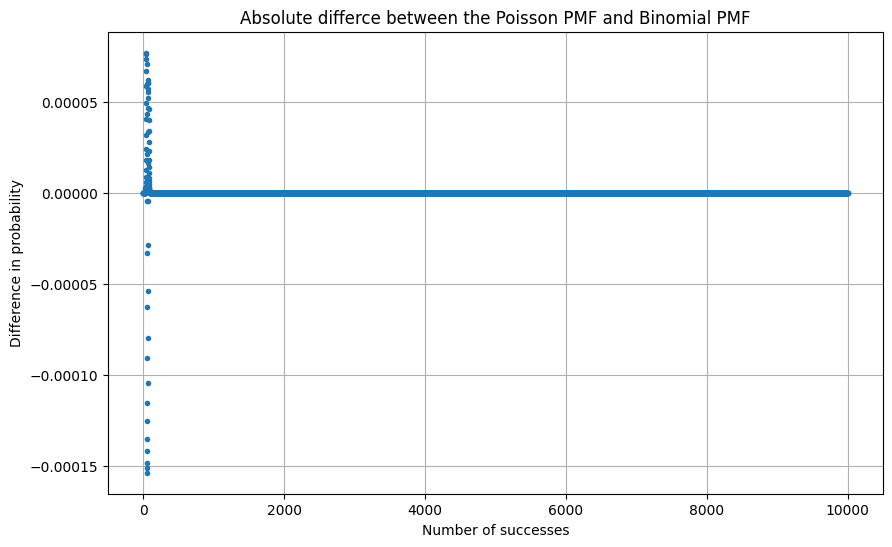

C:\Users\Wilmer\AppData\Local\Temp\ipykernel_20308\2339616010.py:46: RuntimeWarning: divide by zero encountered in divide
  plt.plot(largex, (poisson_pmf_largex - binomial_pmf_largex) / binomial_pmf_largex, marker = '.', linestyle='None')
C:\Users\Wilmer\AppData\Local\Temp\ipykernel_20308\2339616010.py:46: RuntimeWarning: invalid value encountered in divide
  plt.plot(largex, (poisson_pmf_largex - binomial_pmf_largex) / binomial_pmf_largex, marker = '.', linestyle='None')


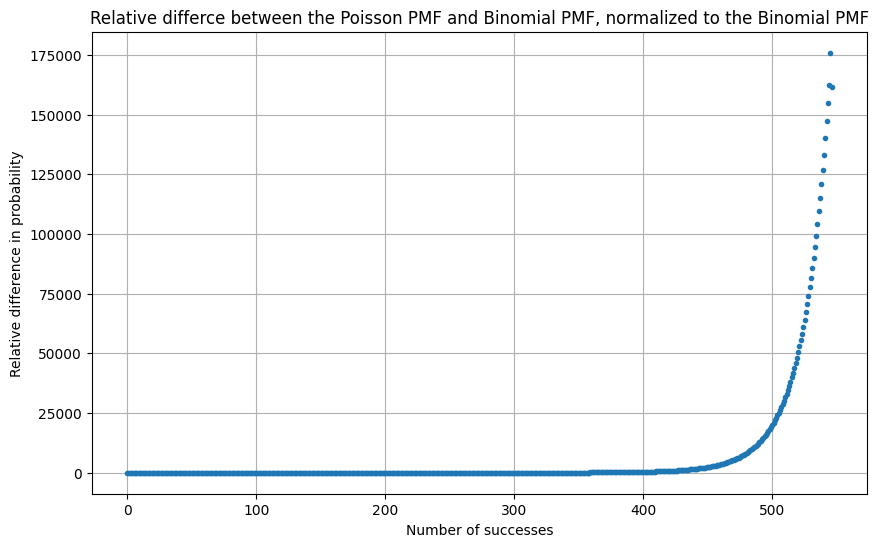

In [73]:
# Range of x values to plot
smallx = np.arange(0, 100)
largex = np.arange(0, 10000)

# Poisson PMF
poisson_pmf_smallx = sp.stats.poisson.pmf(smallx, mu)
poisson_pmf_largex = sp.stats.poisson.pmf(largex, mu)

# Binomial PMF
binomial_pmf_smallx = sp.stats.binom.pmf(smallx, 10000, p_cloudy)
binomial_pmf_largex = sp.stats.binom.pmf(largex, 10000, p_cloudy)

# Plot the PMFs for small x
plt.figure(figsize=(10, 6))
plt.plot(smallx, poisson_pmf_smallx, label='Poisson(λ=59)', marker='.', linestyle='None', color='b')
plt.plot(smallx, binomial_pmf_smallx, label='Binomial(n=10000, p=0.0059)', marker='x', linestyle='None', color='r')
plt.title('PMF of Poisson and Binomial Distributions')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

# Plot the PMFs for large x
plt.figure(figsize=(10, 6))
plt.plot(largex, poisson_pmf_largex, label='Poisson(λ=59)', marker='.', linestyle='None', color='b')
plt.plot(largex, binomial_pmf_largex, label='Binomial(n=10000, p=0.0059)', marker='x', linestyle='None', color='r')
plt.title('PMF of Poisson and Binomial Distributions')
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

# Plot of the absolute difference
plt.figure(figsize=(10, 6))
plt.plot(largex, (poisson_pmf_largex - binomial_pmf_largex), marker = '.', linestyle='None')
plt.title('Absolute differce between the Poisson PMF and Binomial PMF')
plt.xlabel('Number of successes')
plt.ylabel('Difference in probability')
plt.grid(True)
plt.show()

# Plot of the relative difference, using the binomial as the standard
plt.figure(figsize=(10, 6))
plt.plot(largex, (poisson_pmf_largex - binomial_pmf_largex) / binomial_pmf_largex, marker = '.', linestyle='None')
plt.title('Relative differce between the Poisson PMF and Binomial PMF, normalized to the Binomial PMF')
plt.xlabel('Number of successes')
plt.ylabel('Relative difference in probability')
plt.grid(True)
plt.show()

We see that the distributions are indistinguishable, and their absolute difference is negligeble. Their relative difference tends to grow as $x$ increases, but after $x \sim 550$, the probabilities become essentially zero for the python memory anyway, so the relative difference is not a useful metric.

# e.

If we approximate the binomial distribution with a Poisson distribution, we find:

In [74]:
probability = 1 - sp.stats.poisson.cdf(100, 60)
print(probability)

8.685389315532532e-07


This probability is one order of magnitude larger than our answer in 3.1.e., but still very small.